In [1]:
import numpy as np
import pandas as pd
import os


In [2]:
myfile = 'data/Infofile.csv'
plagdf = pd.read_csv(myfile)
plagdf.head()

,FileName,Assctask,Cattype
0,0Aa.txt,a,notplg
1,0Ab.txt,b,nearplg
2,0Ac.txt,c,lightplg
3,0Ad.txt,d,majorplg
4,0Ae.txt,e,notplg


In [3]:
def numdf(myfile='data/Infofile.csv'):
    plagdf = pd.read_csv(myfile)
    plagdf['ClassVal'] = plagdf['Cattype']
    cat_map = {'notplg': 0, 'majorplg': 1,
               'lightplg': 2, 'nearplg': 3, 'orgfile': -1}
    cls_map = {'notplg': 0, 'majorplg': 1,
               'lightplg': 1, 'nearplg': 1, 'orgfile': -1}
    plagdf = plagdf.replace({'Cattype': cat_map, 'ClassVal': cls_map})
    return plagdf


In [4]:
tdf = numdf(myfile='data/Infofile.csv')
tdf.head(10)


,FileName,Assctask,Cattype,ClassVal
0,0Aa.txt,a,0,0
1,0Ab.txt,b,3,1
2,0Ac.txt,c,2,1
3,0Ad.txt,d,1,1
4,0Ae.txt,e,0,0
5,0Ba.txt,a,0,0
6,0Bb.txt,b,0,0
7,0Bc.txt,c,3,1
8,0Bd.txt,d,2,1
9,0Be.txt,e,1,1


In [5]:
import unitplb as tests
tests.tstnumdf(numdf)
tdf = numdf(myfile='data/Infofile.csv')
print('\nExample set: ')
tdf.head()


Test cases got passed!

Example set: 


,FileName,Assctask,Cattype,ClassVal
0,0Aa.txt,a,0,0
1,0Ab.txt,b,3,1
2,0Ac.txt,c,2,1
3,0Ad.txt,d,1,1
4,0Ae.txt,e,0,0


In [6]:
import pyhelp
textdf = pyhelp.crtxtcol(tdf)
textdf.head()


,FileName,Assctask,Cattype,ClassVal,TextVal
0,0Aa.txt,a,0,0,inheritance is a basic concept of object orien...
1,0Ab.txt,b,3,1,pagerank is a link analysis algorithm used by ...
2,0Ac.txt,c,2,1,the vector space ourmodel also called term vec...
3,0Ad.txt,d,1,1,bayes theorem was names after rev thomas bayes...
4,0Ae.txt,e,0,0,dynamic programming is an algorithm design tec...


In [7]:
indexrow = 0
sample = textdf.iloc[0]['TextVal']
print('Sample processing:\n\n', sample)


Sample processing:

 inheritance is a basic concept of object oriented programming where the basic idea is to create new classes that add extra detail to existing classes this is done by allowing the new classes to reuse the methods and variables of the existing classes and new methods and classes are added to specialise the new class inheritance ourmodels the is kind of relationship between entities or objects  for example postgraduates and undergraduates are both kinds of student this kind of relationship can be visualised as a tree structure where student would be the more general root node and both postgraduate and undergraduate would be more specialised extensions of the student node or the child nodes  in this relationship student would be known as the superclass or parent class whereas  postgraduate would be known as the subclass or child class because the postgraduate class extends the student class  inheritance can occur on several layers where if visualised would display a la

In [8]:
import pyhelp
random_seed = 1
comp_df = pyhelp.trtsdf(textdf, random_seed=random_seed)
comp_df.head(100)


,FileName,Assctask,Cattype,ClassVal,TextVal,Datatype
0,0Aa.txt,a,0,0,inheritance is a basic concept of object orien...,train
1,0Ab.txt,b,3,1,pagerank is a link analysis algorithm used by ...,test
2,0Ac.txt,c,2,1,the vector space ourmodel also called term vec...,train
3,0Ad.txt,d,1,1,bayes theorem was names after rev thomas bayes...,train
4,0Ae.txt,e,0,0,dynamic programming is an algorithm design tec...,train
...,...,...,...,...,...,...
95,orga.txt,a,-1,-1,in object oriented programming inheritance is ...,orgfile
96,orgb.txt,b,-1,-1,pagerank is a link analysis algorithm used by ...,orgfile
97,orgc.txt,c,-1,-1,vector space ourmodel or term vector ourmodel ...,orgfile
98,orgd.txt,d,-1,-1,in probability theory bayes theorem often call...,orgfile


In [9]:
from sklearn.feature_extraction.text import CountVectorizer


def calccontainment(df, n, ansfile):
    stxt, atxt = pyhelp.getanssrctxt(df, ansfile)
    counts = CountVectorizer(analyzer='word', ngram_range=(n, n))
    ngrams = counts.fit_transform([atxt, stxt])
    ngram_array = ngrams.toarray()
    intersection_ngram_sum = sum(min(answer_ngram, source_ngram)
                                 for answer_ngram, source_ngram in zip(*ngram_array))
    containment_value = intersection_ngram_sum/np.sum(ngram_array[0])
    return containment_value


In [10]:
n = 3
testindex = range(5)
catval = []
containment_vals = []
for i in testindex:
    catval.append(comp_df.loc[i, 'Cattype'])
    filename = comp_df.loc[i, 'FileName']
    c = calccontainment(comp_df, n, filename)
    containment_vals.append(c)
print('original values: \n', catval)
print()
print(str(n)+'-gram values: \n', containment_vals)


original values: 
 [0, 3, 2, 1, 0]

3-gram values: 
 [0.009345794392523364, 0.9641025641025641, 0.6136363636363636, 0.15675675675675677, 0.031746031746031744]


In [11]:
tests.testctmt(comp_df, calccontainment)


Test cases got passed!


In [12]:
def normlcs(atxt, stxt):
    srcsplit = stxt.split()
    anssplit = atxt.split()
    rows = len(anssplit) + 1
    columns = len(srcsplit) + 1
    lcsmtx = [[0 for i in range(columns)] for j in range(rows)]
    for i in range(1, rows):
        for j in range(1, columns):
            if anssplit[i - 1] == srcsplit[j - 1]:
                lcsmtx[i][j] = lcsmtx[i - 1][j - 1] + 1
            else:
                lcsmtx[i][j] = max(lcsmtx[i - 1][j], lcsmtx[i][j - 1])
    lcsnzval = lcsmtx[rows - 1][columns - 1]/len(anssplit)
    return lcsnzval


In [13]:

A = "The lion (Panthera leo) is a large cat of the genus Panthera native to Africa and India. It has a muscular, deep-chested body, short, rounded head, round ears, and a hairy tuft at the end of its tail."
S = "The lion is a large cat of the genus Panthera to Africa and India. It has a-hested body, short, rounded , round ears, and a  tuft at the end of its ."
lcs = normlcs(A, S)
print('LCS = ', lcs)
assert round(lcs,2)==round(20.6/27,2), "Incorrect LCS value, expected about 0.7408, got "+str(lcs)
print('Test case is passed successfully!')


LCS =  0.7631578947368421
Test case is passed successfully!


In [14]:
tests.test_lcs(comp_df, normlcs)


Test cases got passed!


In [15]:
testindex = range(5)
catval = []
lcs_norm_vals = []
for i in testindex:
    catval.append(comp_df.loc[i, 'Cattype'])
    atxt = comp_df.loc[i, 'TextVal']
    task = comp_df.loc[i, 'Assctask']
    orgfile_rows = comp_df[(comp_df['ClassVal'] == -1)]
    orgfile_row = orgfile_rows[(orgfile_rows['Assctask'] == task)]
    stxt = orgfile_row['TextVal'].values[0]
    lcs_val = normlcs(atxt, stxt)
    lcs_norm_vals.append(lcs_val)
print('original category values are : \n', catval)
print()
print('Normalized LCS values are: \n', lcs_norm_vals)


original category values are : 
 [0, 3, 2, 1, 0]

Normalized LCS values are: 
 [0.1917808219178082, 0.8207547169811321, 0.8464912280701754, 0.3160621761658031, 0.24257425742574257]


In [16]:
def ccntfeature(df, n, namecol=None):
    cntval = []
    if(namecol== None):
        namecol= 'c_'+str(n)  # c_1, c_2, .. c_n
    for i in df.index:
        file = df.loc[i, 'FileName']
        if df.loc[i, 'Cattype'] > -1:
            c = calccontainment(df, n, file)
            cntval.append(c)
        else:
            cntval.append(-1)
    print(str(n)+'-gram containment features successfullycreated!')
    return cntval


In [17]:
def crt_lcsftr(df, namecol='lcs_word'):
    lcs_values = []
    for i in df.index:
        if df.loc[i, 'Cattype'] > -1:
            # get texts to compare
            atxt = df.loc[i, 'TextVal']
            task = df.loc[i, 'Assctask']
            orgfile_rows = df[(df['ClassVal'] == -1)]
            orgfile_row = orgfile_rows[(orgfile_rows['Assctask'] == task)]
            stxt = orgfile_row['TextVal'].values[0]
            lcs = normlcs(atxt, stxt)
            lcs_values.append(lcs)
        else:
            lcs_values.append(-1)
    print('LCS features successfully created!')
    return lcs_values


In [18]:
import numpy as np
ngram_range = range(1, 15)
ftrlist = []
allftr = np.zeros((len(ngram_range)+1, len(comp_df)))
i = 0
for n in ngram_range:
    namecol= 'c_'+str(n)
    ftrlist.append(namecol)
    allftr[i] = np.squeeze(ccntfeature(comp_df, n))
    i += 1
ftrlist.append('lcs_word')
allftr[i] = np.squeeze(crt_lcsftr(comp_df))
ftrsdf = pd.DataFrame(np.transpose(allftr), columns=ftrlist)
print()
print('Features created: ', ftrlist)
print()


1-gram containment features successfullycreated!
2-gram containment features successfullycreated!
3-gram containment features successfullycreated!
4-gram containment features successfullycreated!
5-gram containment features successfullycreated!
6-gram containment features successfullycreated!
7-gram containment features successfullycreated!
8-gram containment features successfullycreated!
9-gram containment features successfullycreated!
10-gram containment features successfullycreated!
11-gram containment features successfullycreated!
12-gram containment features successfullycreated!
13-gram containment features successfullycreated!
14-gram containment features successfullycreated!
LCS features successfully created!

Features created:  ['c_1', 'c_2', 'c_3', 'c_4', 'c_5', 'c_6', 'c_7', 'c_8', 'c_9', 'c_10', 'c_11', 'c_12', 'c_13', 'c_14', 'lcs_word']



In [19]:
ftrsdf.head(10)


,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,c_10,c_11,c_12,c_13,c_14,lcs_word
0,0.398148,0.079070,0.009346,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.191781
1,1.000000,0.984694,0.964103,0.943299,0.922280,0.901042,0.879581,0.857895,0.835979,0.813830,0.791444,0.768817,0.745946,0.722826,0.820755
2,0.869369,0.719457,0.613636,0.515982,0.449541,0.382488,0.319444,0.265116,0.219626,0.197183,0.174528,0.151659,0.133333,0.114833,0.846491
3,0.593583,0.268817,0.156757,0.108696,0.081967,0.060440,0.044199,0.027778,0.011173,0.000000,0.000000,0.000000,0.000000,0.000000,0.316062
4,0.544503,0.115789,0.031746,0.005319,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.242574
5,0.329502,0.053846,0.007722,0.003876,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.161172
6,0.590308,0.150442,0.035556,0.004464,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.301653
7,0.765306,0.709898,0.664384,0.625430,0.589655,0.553633,0.520833,0.487805,0.454545,0.424561,0.394366,0.378092,0.361702,0.348754,0.621711
8,0.759777,0.505618,0.395480,0.306818,0.245714,0.195402,0.150289,0.110465,0.070175,0.035294,0.017751,0.005952,0.000000,0.000000,0.484305
9,0.884444,0.526786,0.340807,0.247748,0.180995,0.150000,0.118721,0.091743,0.064516,0.041667,0.023256,0.009346,0.004695,0.000000,0.597458


In [20]:
comtx = ftrsdf.corr().abs().round(2)
display(comtx)


,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,c_10,c_11,c_12,c_13,c_14,lcs_word
c_1,1.00,0.94,0.90,0.89,0.88,0.87,0.87,0.87,0.86,0.86,0.86,0.86,0.86,0.86,0.97
c_2,0.94,1.00,0.99,0.98,0.97,0.96,0.95,0.94,0.94,0.93,0.92,0.92,0.91,0.91,0.98
c_3,0.90,0.99,1.00,1.00,0.99,0.98,0.98,0.97,0.96,0.95,0.95,0.94,0.94,0.93,0.97
c_4,0.89,0.98,1.00,1.00,1.00,0.99,0.99,0.98,0.98,0.97,0.97,0.96,0.96,0.95,0.95
c_5,0.88,0.97,0.99,1.00,1.00,1.00,1.00,0.99,0.99,0.98,0.98,0.97,0.97,0.97,0.95
c_6,0.87,0.96,0.98,0.99,1.00,1.00,1.00,1.00,0.99,0.99,0.99,0.98,0.98,0.98,0.94
c_7,0.87,0.95,0.98,0.99,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.99,0.99,0.98,0.93
c_8,0.87,0.94,0.97,0.98,0.99,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.99,0.99,0.92
c_9,0.86,0.94,0.96,0.98,0.99,0.99,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.91
c_10,0.86,0.93,0.95,0.97,0.98,0.99,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.91


In [21]:
def tr_ts_data(comp_df, ftrsdf, selectftrs):
    train_x = ftrsdf[comp_df['Datatype'] == 'train'][selectftrs].to_numpy()
    train_y = comp_df[comp_df['Datatype'] == 'train']['ClassVal'].to_numpy()
    xtst = ftrsdf[comp_df['Datatype'] == 'test'][selectftrs].to_numpy()
    ytst = comp_df[comp_df['Datatype'] == 'test']['ClassVal'].to_numpy()
    return (train_x, train_y), (xtst, ytst)


In [22]:
tstselect = list(ftrsdf)[:2]
(train_x, train_y), (xtst, ytst) = tr_ts_data(
    comp_df, ftrsdf, tstselect)
tests.test_data_split(train_x, train_y, xtst, ytst)


Test cases got passed!


<AxesSubplot:>

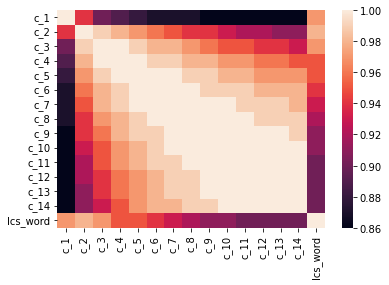

In [23]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
sb.heatmap(comtx)


In [24]:
corrtld = 1.0
columns = np.full((comtx.shape[0],), True, dtype=bool)
for i in range(comtx.shape[0]):
    for j in range(i+1, comtx.shape[0]):
        if comtx.iloc[i, j] >= corrtld:
            if columns[j]:
                columns[j] = False
selectftrs = ftrsdf.columns[columns].to_list()
selectftrs


['c_1', 'c_2', 'c_3', 'lcs_word']

In [25]:
(train_x, train_y), (xtst, ytst) = tr_ts_data(comp_df, ftrsdf, selectftrs)
print('Training size: ', len(train_x))
print('Test size: ', len(xtst))
print()
print('Training df sample: \n', train_x[:10])


Training size:  70
Test size:  25

Training df sample: 
 [[0.39814815 0.07906977 0.00934579 0.19178082]
 [0.86936937 0.71945701 0.61363636 0.84649123]
 [0.59358289 0.2688172  0.15675676 0.31606218]
 [0.54450262 0.11578947 0.03174603 0.24257426]
 [0.32950192 0.05384615 0.00772201 0.16117216]
 [0.59030837 0.15044248 0.03555556 0.30165289]
 [0.75977654 0.50561798 0.39548023 0.48430493]
 [0.51612903 0.07027027 0.         0.27083333]
 [0.44086022 0.11891892 0.02717391 0.22395833]
 [0.97945205 0.91724138 0.875      0.9       ]]


In [26]:
def makingcsvfile(x, y, filename, data_dir):
    if not os.path.exists(data_dir):
        os.makedirs(data_dir)
    pd.concat([pd.DataFrame(y), pd.DataFrame(x)], axis=1).to_csv(
        os.path.join(data_dir, filename), header=False, index=False)
    print('Path created: '+str(data_dir)+'/'+str(filename))


In [27]:
dup_x = [[0.39814815, 0.0001, 0.19178082],
         [0.86936937, 0.44954128, 0.84649123],
         [0.44086022, 0., 0.22395833]]
dup_y = [0, 1, 1]
makingcsvfile(dup_x, dup_y, filename='todel.csv', data_dir='test_csv')
dup_df = pd.read_csv('test_csv/todel.csv', header=None)
assert dup_df.shape == (3, 4), \
    'The file have rows equal to data_points and columns equal to features+1.'
assert np.all(dup_df.iloc[:, 0].values ==
              dup_y), 'First column is not equal to the labels, dup_y.'
print('Test cases passed!')


Path created: test_csv/todel.csv
Test cases passed!


In [28]:
data_dir = 'plagdata'
makingcsvfile(train_x, train_y, filename='train.csv', data_dir=data_dir)
makingcsvfile(xtst, ytst, filename='test.csv', data_dir=data_dir)


Path created: plagdata/train.csv
Path created: plagdata/test.csv
